## Homework 10

#### *DATA 1010*

Please see https://github.com/ym-han/HW10 for git repo

In [1]:
Pkg.rm("LinearAlgebra"); Pkg.add("LinearAlgebra")


UndefVarError: UndefVarError: Pkg not defined

In [2]:

Pkg.build("Rmath")

UndefVarError: UndefVarError: Pkg not defined

In [68]:
using Random, LinearAlgebra, Statistics
using Distributions, Plots, LaTeXStrings
gr(fontfamily = "Palatino");

In [4]:
import Pkg; 
Pkg.add("LinearAlgebra")
Pkg.add("TSne")
Pkg.add("QuartzImageIO")
Pkg.add("ImageMagick")
Pkg.add("PlotThemes")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.to

---

## Problem 1



Consider the XOR classification problem. We have to find a decision boundary separating points labelled in blue and red, shown below:

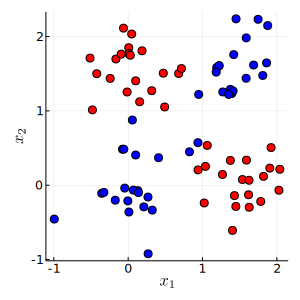

In [5]:
Random.seed!(123)

blue_points = [
    rand(MvNormal([1.5; 1.5], [[0.1 0.0]; [0.0 0.1]]), 20)';
    rand(MvNormal([0.0; 0.0], [[0.1 0.0]; [0.0 0.1]]), 20)'
]

red_points = [
    rand(MvNormal([1.5; 0.0], [[0.1 0.0]; [0.0 0.1]]), 20)';
    rand(MvNormal([0.0; 1.5], [[0.1 0.0]; [0.0 0.1]]), 20)'
]

plot(xlabel=L"x_1", ylabel=L"x_2", legend = false, ratio = 1, size = (300, 300))
scatter!(blue_points[:,1], blue_points[:,2], color=:blue)
scatter!(red_points[:,1], red_points[:,2], color=:red)

(a) For each of the following models, determine whether the model is an appropriate choice for solving the XOR classification problem: LDA, QDA, Naive Bayes, Linear SVM, Kernelized SVM, Logistic Regression, Decision Tree. Provide a brief justification for your answer. 

(b) Explore different architectures on [Tensorflow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.40593&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to find the smallest neural network that can accurately classify these points. Write down the weights and biases of each hidden layer as a matrix. Draw a diagram illustrating the architecture you selected and write an expression for the function ($x_1$ and $x_2$) that computes the output of the final layer. 

(a)

LDA: No, because the covariance varies between classes.

QDA: Yes. The assumption that the distributions are MVN works, and there are quadric surfaces that can be used to separate the classes. 

Naive Bayes: No, because the features are not conditionally independent given class.

Linear SVM: No, because there isn't the plausible hyper plane that can distinguish between the classes, given how they are situated in the feature space.

Kernelized SVM: Yes, since non-linear decision boundaries are available.

Logistic Regression: No, because the regression function is an increasing function.

Decision Tree: Yes. We can separate the four quadrants of the graph with horizontal and vertical lines --- ie, with splits, each of which involves only one feature variable.



(b) Incomplete: ran out of time, sorry

--- 

## Problem 2

In this exercise we explore the connection between SVM and single-layer perceptron model.

Suppose we have a training dataset D of size $N$: $$ D = \{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \cdots (\mathbf{x}_N, y_N)\}, $$ where $\mathbf{x}_i \in \mathbb{R}^n$, $y_i \in \{+1, -1\}$. Suppose that our points are linearly separable.

Define $\mathbf{w} \in \mathbb{R}^n$ and $b \in \mathbb{R}$. Define $$\Phi(\mathbf{x}, \mathbf{w}, b) = \mathbf{w} \cdot \mathbf{x} + b.$$ 

(a) Find a function $g$ and classification criteria such that $g(\Phi(\mathbf{x}, \mathbf{w}, b))$ and the classification criteria give a logistic regression classifier, an SVM classifier, and a perceptron classifier.

(b) Use the loss functions for perceptron and SVM classifiers to explain why a hard-margin SVM can be viewed as a perceptron with additional penalty terms given a linearly separable classification problem. 

(c) What advantages does the hard-margin SVM have over the single-layer perceptron when it comes to training?

### (a)

**Logistic regression:**

Let $g$ be $\sigma(\mathbf{x})=\frac{1}{1+e^{-x}}$, so that $r(\mathbf{x})=\sigma(\mathbf{w}\cdot\mathbf{x}+b)$  
Classification criteria: 1 if $\log(\frac{1}{r_{i}(\mathbf{x})})\leq\log(\frac{1}{1-r_{i}(\mathbf{x})})$ 


**SVM**
Let $g$ be the signum function.
And use the classification function
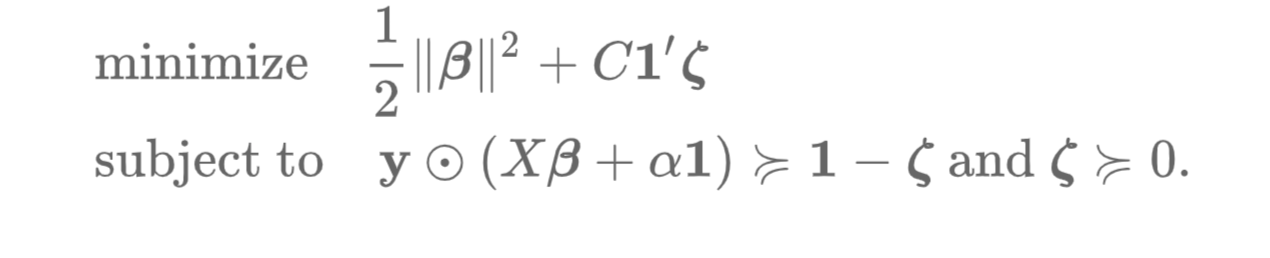


Incomplete, sorry.

c) It can find the best decision boundary

## Problem 3

(a) Consider the coordinates of $n$ points in $\mathbb{R}^p$, organized into an $n\times p$ matrix $A$. Suppose that `U, Σ, V = svd(A .- mean(A, dims=1))`, and explain why `V[:,1:k]'` is the matrix which maps any point in $\mathbb{R}^p$ to its coordinates in the subspace of $\mathbb{R}^p$ spanned by the columns of `V[:,1:k]`. (Note: this one is linear algebra review.)

(b) Plot an image of the *third* principal component for the MNIST dataset. Identify a digit which you think should predominantly have a large or small dot product with this image, and make a scatter plot of which shows the dot product with the first principal component on the $x$-axis and the dot product with the third principal component on the $y$-axis. Check whether your prediction was accurate.

(c) What do you think the 100th principal component might look like, compared to the first few? Display it and check your prediction.

*Proposed answer*  
**(a)** To make the notation simpler / more similar to math notation, call `V[:,1:k]` $V$, and call `V[:,1:k]'` $V^T$.

**Show why:** 
> If $V^{T}\mathbf{x}=\mathbf{y}$, then $\mathbf{y}=\begin{pmatrix}\alpha_{1}\\
\alpha_{2}\\
\vdots\\
\alpha_{n}
\end{pmatrix}$, where $\alpha_{1},\dots,\alpha_{n}$ are the coordinates of $\mathbf{x}$ in Ran $V$ --- i.e., its coordinates in the basis $\{\mathbf{v},\mathbf{v}_{2},\dots,\mathbf{v}_{n}\}$ constituted by the column vectors of $V$. (Note: I'm obviously using 'k' in two different ways, but hopefully that won't be too confsuing.)

Suppose $V^{T}\mathbf{x}=\mathbf{y}$. Then, for each component $y_{k}$ of $\mathbf{y}$, 

> $y_{k}=\mathbf{v_{k}}\cdot\mathbf{x}$,

where $\mathbf{v}_{k}$ is the $k$-th column of $V$. (This follows from the definition of matrix multiplication and from how the row vectors of $V^T$ are the column vectors of $V$.)

But $y_{k}=\mathbf{v_{k}}\cdot\mathbf{x}=\alpha_{k}$,
the $k$-th coordinate of $\mathbf{x}$ in the basis $\{\mathbf{v},\mathbf{v}_{2},\dots,\mathbf{v}_{n}\}$. Or, 

$\mathbf{y}=\begin{pmatrix}\mathbf{v_{1}}\cdot\mathbf{x}\\
\mathbf{v_{2}}\cdot\mathbf{x}\\
\vdots\\
\mathbf{v_{n}}\cdot\mathbf{x}
\end{pmatrix}=\begin{pmatrix}\alpha_{1}\\
\alpha_{2}\\
\vdots\\
\alpha_{n}
\end{pmatrix}$

For in general, $\mathbf{v_{k}}\cdot\mathbf{x}=\alpha_{k}$, if $\mathbf{v}_{1},\dots,\mathbf{v}_{n}$ is an orthonormal basis. 

To see why, consider some orthonormal basis $\mathbf{v}_{1},\dots,\mathbf{v}_{n}$,
and let $z=\sum_{j=1}^{n}\alpha_{j}\mathbf{v}_{j}$. If we take the
inner product on both sides of the equation with $\mathbf{v}_{k}$,
we get: $\begin{aligned}<\mathbf{z},\mathbf{v}_{k}> & =\sum_{j=1}^{n}\alpha_{j}<\mathbf{v}_{j},\mathbf{v}_{k}>\text{ from symmetry and linearity}\\
 & =\alpha_{k}<\mathbf{v}_{k},\mathbf{v}_{k}>\text{ because basis orthogonal }\\
 & =\alpha_{k}\parallel\mathbf{v}_{k}\parallel\\
 & =\alpha_{k} \text{ because unit vector}
\end{aligned}
$



**(b)** 

In [6]:
# begin by loading the dataset and reshaping the training data feature matrix
using MLDatasets, Images, Plots

MNIST.download(i_accept_the_terms_of_use = true)
features, labels = MNIST.traindata(Float64)
A = reshape(features[:],28^2,60_000)'

#= define a function for === displaying images ===

This function accepts a vector of length, it reshapes the entries 
 into a square, and it returns an array of colors for display. 
If some of the components are negative, then 
negative and positive values are represented in different colors 
(red and blue, respectively). Otherwise, the image 
is displayed in grayscale.
=#

function imshow(v)
    if any(v .< 0)
        (x -> x > 0 ? RGB(x,0,0) : RGB(0,0,-x)).(reshape(v./maximum(abs.(v)),(28,28))')
    else
        Gray.(reshape(v./maximum(abs.(v)),(28,28))')
    end
end
"Done!"

┌ Info: Downloading
│   source = http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
│   dest = /Users/ymh/.julia/datadeps/MNIST/train-labels-idx1-ubyte.gz
│   progress = 1.0
│   time_taken = 0.01 s
│   time_remaining = 0.0 s
│   average_speed = 4.591 MiB/s
│   downloaded = 28.204 KiB
│   remaining = 0 bytes
│   total = 28.204 KiB
└ @ HTTP /Users/ymh/.julia/packages/HTTP/hJSsm/src/download.jl:119
┌ Info: Downloading
│   source = http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
│   dest = /Users/ymh/.julia/datadeps/MNIST/t10k-labels-idx1-ubyte.gz
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = 2.166 MiB/s
│   downloaded = 4.436 KiB
│   remaining = 0 bytes
│   total = 4.436 KiB
└ @ HTTP /Users/ymh/.julia/packages/HTTP/hJSsm/src/download.jl:119
┌ Info: Downloading
│   source = http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
│   dest = /Users/ymh/.julia/datadeps/MNIST/t10k-images-idx3-ubyte.gz
│   progress = 1.0
│   time

"Done!"

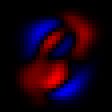

In [7]:
using Statistics, LinearAlgebra  
A = A[1:10_000,:] # make this computationally feasible 
U, Σ, V = svd(A .- mean(A,dims=1)) 
imshow(V[:,3]) # We want the third principal component

**Prediction:** 3 should have a negative dot product with that feature component. That is, the coordinate of 3, when projected onto the span of that feature component, should be quite negative. 

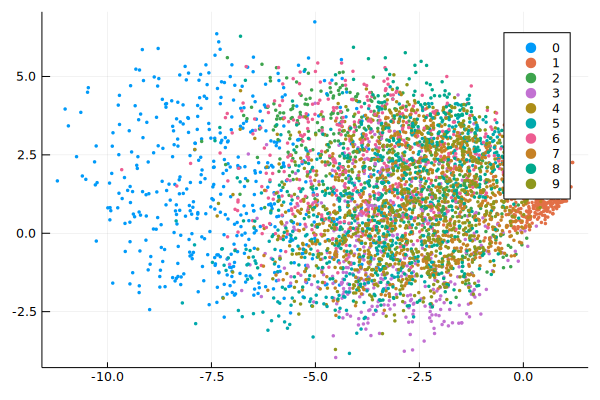

In [8]:
#= identify a digit which you think should predominantly have 
a large or small dot product with this image, and make a scatter plot 
of which shows the dot product with the first principal component 
on the  𝑥 -axis and the dot product with the third principal component 
on the  𝑦 -axis. Check whether your prediction was accurate.
=#
n = 5000
scatter(A[1:n,:]*V[:,1],
        A[1:n,:]*V[:,3],
        group=labels[1:n],
        markersize=2,
        markerstrokewidth=0)


My prediction wasn't very accurate. While some instances of 3 were indeed negative, there also seem to be instances that aren't.

**(c)** Prediction: Since the 100th component doesn't explain very much variance in the data, it should not look especially like any one digit.

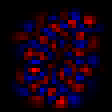

In [9]:
U, Σ, V = svd(A .- mean(A,dims=1)) 
imshow(V[:,100])

Hmm, it looks a little like an 8 to me, but it's also clear enough that this wouldn't do a good job distinguishing between, e.g., 0, 6, maybe even 3, and 8. Which is in line with my prediction.

## Problem 4

(a) PCA does not take any measures to separate points from different classes. Come up with an example of a two-class dataset in $\mathbb{R}^2$ with the property that the classes are separable in the original space, but they get all mixed up when projected to the first principal component. Please illustrate your example by generating points and making a scatter plot.

(b) What about t-SNE? Use the `TSne` package to reduce your dataset from 2 dimensions to 1, and plot the results to see how it compares to PCA.

I have 2 examples which I would have thought should work, but don't seem to.

**(a) Example 1**
which should work, but isn't working as planned

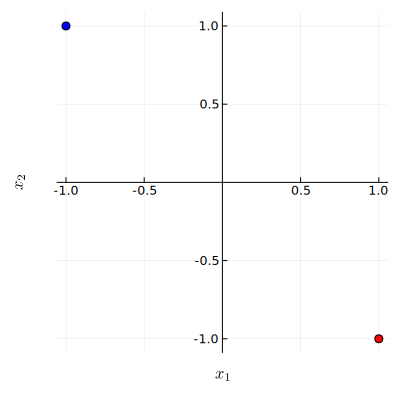

In [120]:

blue_points = [-1 1]

red_points = [1 -1]

plot(xlabel=L"x_1", ylabel=L"x_2", legend = false, ratio = 1)
scatter!(blue_points[:,1], blue_points[:,2], color=:blue)
scatter!(red_points[:,1], red_points[:,2], color=:red)


In [121]:
X = vcat(blue_points, red_points)
μ = mean(X, dims=1)
U, Σ, V = svd(X .- μ) 


# ok let's start by making sure the svd does do here what i thought it would do; namely, give us that 45 deg line between those 2 points. 

SVD{Float64,Float64,Array{Float64,2}}([-0.7071067811865472 0.7071067811865475; 0.7071067811865475 0.7071067811865475], [2.0, 0.0], [0.7071067811865476 -0.7071067811865475; 0.7071067811865475 0.7071067811865476])

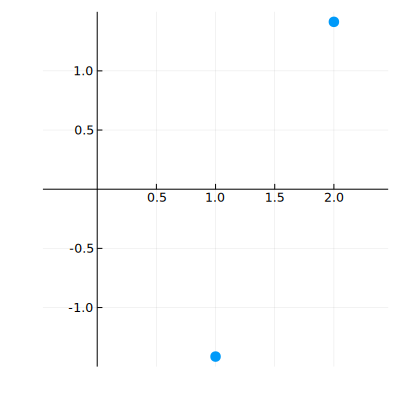

In [123]:
# ok, looks like their new coords are still distinguishable for some reason...

scatter(X*V[:,1],
        markersize=6,
        markerstrokewidth=0,
        ratio = 1)


### Example 2
which I'm also somehow getting wrong too, for reasons I don't understand

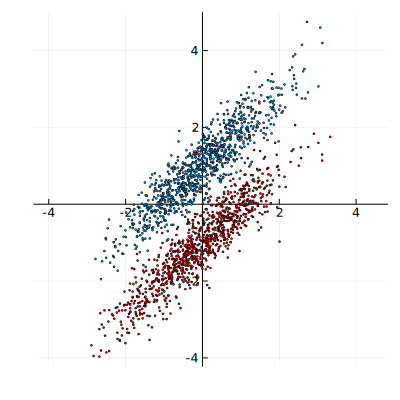

In [133]:

A = [1.1 1.0
    1.0 1.1]
X_b = rand(MvNormal([0.0; 1.0], A), 1000)'
X_r = rand(MvNormal([0.0; -1.0], A), 1000)'
scatter(X_b[:, 1], X_b[:, 2], legend = false, ms = 1, msw = 0.5)

scatter!(X_r[:, 1], X_r[:, 2], ms = 1, msw = 0.5, color=:red)


In [134]:
X2 = vcat(X_b, X_r)
μ2 = mean(X2, dims=1)
U, Σ, V2 = svd(X2 .- μ2) 


SVD{Float64,Float64,Array{Float64,2}}([-0.01654635268948338 -0.0030715370740075775; -0.018357424846298202 -0.010081566926190293; … ; 0.01541851881066127 0.010417402907496277; 0.01722521067816812 0.027975328598345194], [74.36797685311454, 30.746053628946182], [-0.5250052149641583 -0.85109900966952; 0.85109900966952 -0.5250052149641583])

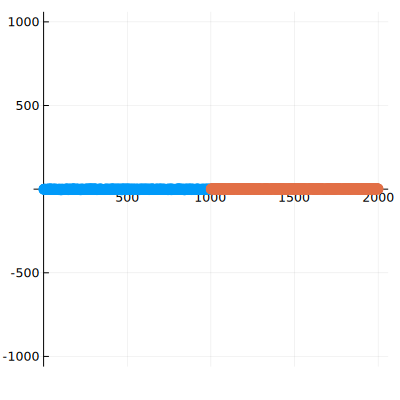

In [135]:
labelBlues = repeat(["blue"], 1000, 1)
labelReds = repeat(["red"], 1000, 1)
labels = vcat(labelBlues, labelReds)

scatter(X2*V2[:,1],
        group=labels[1:2000],
        markersize=6,
        markerstrokewidth=0,
        ratio = 1)


A final theoretical example: two circles, one of which is contained in the other.

---

## Problem 5

A weather station in Providence classifies each day's weather as "good", "fair", or "poor" according to meteorological data. The following table shows the probabilistic relationship between weather on the current day and the probability of the weather expected on next day conditioned on the type of current day.

current\next | good | fair | poor
------------| -----|-----| ----- 
good | 0.60 | 0.30 | 0.10
fair | 0.50 | 0.25 | 0.25
poor | 0.20 | 0.40 | 0.40

(a) Determine the probability that the weather will be "poor" exactly 3 days after a "good" weather day.

(b) Over a long period of time, what percentage of days can we expect to have "good" weather?

In [138]:
Q = [0.6 0.3 0.1
    0.5 0.25 0.25
    0.2 0.4 0.4]

(Q^3)[1, 3]

0.19675

a) The probability is 0.19675.

b) 48.6%

In [139]:
eigen(copy(Q'))

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
3-element Array{Float64,1}:
 -0.0886000936329383 
  0.33860009363293836
  0.9999999999999993 
eigenvectors:
3×3 Array{Float64,2}:
  0.49704   -0.772796  -0.795866
 -0.809513   0.158165  -0.500258
  0.312473   0.61463   -0.341085

In [141]:
Q^1000

3×3 Array{Float64,2}:
 0.486111  0.305556  0.208333
 0.486111  0.305556  0.208333
 0.486111  0.305556  0.208333

In [143]:
0.795866/(0.795866 + 0.500258 + 0.341085)


0.48611142499216653

---

## Problem 6

Consider the state space $X = \{0, 1\}^n$ of binary strings having length $n$. Define $p(y, x) = 1/n$ if $y$ differs from $x$ in exactly one bit, and $p(y, x) = 0$ otherwise. 

Suppose we desire an equilibrium distribution $\pi$ for which $\pi(x)$ is proportional to the number of ones that occur in vector $\mathbf{x}$. For example, in the long run, a random walk should visit a string having five 1’s five times as often as it visits a string having only a single 1. 

Provide a general formula for the acceptance ratio $\alpha(x, y)$ that would be used if we were to obtain the desired equilibrium distribution using the Metropolis-Hastings algorithm.

Suppose y is the new string that's being proposed. Intuitively, we want the acceptance ratio $\frac{f(\mathbf{y})}{f(\mathbf{x})}=\frac{\text{number of 1s in }\mathbf{y}}{\text{number of 1s in }\textbf{x}}$ 


---

## Problem 7

In this exercise, we will develop a MCMC sampler for linear regression. First, we generate some data, assuming the true regression function:

$$ r(x) = -x + 0.2 $$

In [ ]:
x = rand(Uniform(0, 100), 1000)
y_mean = -x .+ 0.2
y = y_mean + rand(Normal(0, 1.5), 1000)
scatter(x, y)

Use MCMC sampling to fit a linear regression model to predict $y$ given $x$. Use $\mathcal{N}(0, 100)$ prior for the intercept and the slope and $\operatorname{Inv-Gamma}(0.001, 0.001)$ prior for the standard deviation. Generate 10,000 samples for each of the model parameters.

Incomplete: ran out of time, sorry

In [ ]:
N = Normal(0, 10)
δ(x,y,m,b) = sum((yᵢ - m*xᵢ - b)^2/2 for (xᵢ, yᵢ) in zip(x,y))
function α(x, y, m, b, m_prop, b_prop)
    min(1.0, exp(-δ(x,y,m_prop,b_prop) + δ(x,y,m,b)) * 
        pdf(N, m_prop)/pdf(N, m) * pdf(N, b_prop)/pdf(N, b))
end

In [ ]:
function mcmc(n_iterations)
    m, b, σ = 0.0, 0.0, 1.0
    θs = [(m, b)]
    for i in 1:n_iterations
        m_prop, b_prop = m + rand(Normal(0,0.005)), b + rand(Normal(0,0.005))
        if rand() < α(x, y, m, b, m_prop, b_prop)
            m, b = m_prop, b_prop
            push!(θs, (m, b))
        end
    end
    θs
end

In [ ]:
θs = mcmc(3_000);

In [ ]:
#@manipulate for i in slider(1:length(θs), value = 1)
m, b = θs[end]
observations()
plot!(0:1, x-> m*x + b, size = (400, 300), ylims = (-0.5, 1))
#end

---

## Problem 8

For convenience, define the pdf for a normal distribution as
$$f(x; \mu, \eta) = \left( \frac{\eta}{2\pi} \right)^{\frac{1}{2}} \text{exp}\left(  -\frac{1}{2}\eta(x - \mu)^2 \right).$$

In other words, $\eta$ is a place holder for $\frac{1}{\sigma^2}$. We call $\eta$ the **precision** of a normal distribution.

Suppose we have a prior distribution for the unknown mean of a normal distribution $ N(\mu, \eta_0 ^{-1})$. The prior distribution for this mean $f_M(\mu)$ is given by $N(\mu_0, \eta_{p}^{-1})$. In this problem we will show computationally that the posterior mean $\mu_{\text{post}}$ is weighted sum of the sample mean and the prior mean. In the process, we will derive the posterior variance $\eta_{\text{post}}$ and observe its form.

1. Show that the posterior distribution is proportional to the following expression: 

$$ f_{M; X}(\mu; x) \propto \text{exp}\left( -\frac 12 [n\eta_0(\bar{x} - \mu)^2 + \eta_p(\mu - \mu_0^2)] \right).$$

2. Re-arrange terms to format the expression in the form of a normal distribution. You will find the mean and standard deviation of the posterior distribution:

$$ \mu_{\text{post}} = \frac{n\eta_0\bar{x} + \mu_0 \eta_p}{n \eta_0 + \eta_p}$$ and

$$ \eta_{\text{post}} = n\eta_0 + \eta_p$$

3. Re-write the posterior mean as a weighted sum of $\bar{x}$ and $\mu_0$. Explain how these results agree with the observation that posterior parameters are functions of both the data and the prior distribution.

*Hint:* Without proof, you may use the identity: $\sum_{i=1}^n(x_i - \mu)^2 = \sum_{i=1}^n(x_i - \bar{x})^2 + n(\mu - \bar{x})^2$ in your calculations.

Incomplete: ran out of time, sorry